Tokens that start with the letter "A":
(0.0003565709825261751, 'AGO')
(0.00037429251755208585, 'AMONG')
(0.0002796553622515356, 'AGENCY')
(0.00025907196442640943, 'AVERAGE')
(0.001181814804064031, 'ALL')
(0.00026278994002880895, 'AGREEMENT')
(0.018407244690712494, 'A')
(0.000595964582662253, 'AGAINST')
(0.0002490799049949608, 'ALREADY')
(0.00020205485173434878, 'AWAY')
(0.00021426057427117345, 'ALTHOUGH')
(0.0004283866165304179, 'ANOTHER')
(0.00022603824040640604, 'ANALYSTS')
(0.00020669009105444552, 'APRIL')
(0.00022715118705054536, 'ANNOUNCED')
(0.00027685465036683335, 'AROUND')
(0.0006120961939108219, 'AMERICAN')
(0.0002310893059451922, 'AREA')
(0.0002915186396670866, 'ADMINISTRATION')
(0.0013465675979453587, 'AFTER')
(0.00021177784714193957, 'AGREED')
(0.017863233925020615, 'AND')
(0.0006318601694814718, 'ANY')
(0.00031100132103097604, 'AIR')
(0.0003475451075440342, 'ACCORDING')
(0.0029896926709136874, 'ARE')
(0.0013100115812493978, 'ALSO')
(0.0019256178376532746, 'ABOUT')
(0.00022

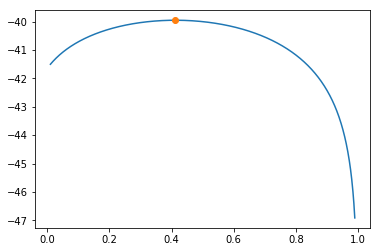

In [19]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

f = open('cs250a-hw4/hw4_vocab.txt','r')
vocab = [line.strip('\n').upper() for line in f.readlines()]
f.close()


f = open('cs250a-hw4/hw4_unigram.txt','r')
raw_unigram = [line.strip('\n').upper() for line in f.readlines()]
f.close()

unigram_count = {}
unigram_dist = {}

N = 0
for k in range(len(vocab)):
    N += int(raw_unigram[k])
    unigram_count[vocab[k]] = int(raw_unigram[k])

#a
print('=====================================')
print('Tokens that start with the letter "A":')
for k, v in unigram_count.items():
    unigram_dist[k] = float(v) / N
    if k[0] == 'A':
        print(unigram_dist[k],k)

print('=====================================')
#b
f = open('cs250a-hw4/hw4_bigram.txt','r')
raw_bigram = [line.strip('\n').split() for line in f.readlines()]
f.close()

bigram_count = {}
bigram_dist = {}
bigram_dist_followed_the = {}

print('The five most likely words to follow the word "THE":')
for k in range(len(raw_bigram)):
    first = vocab[int(raw_bigram[k][0]) - 1]
    second = vocab[int(raw_bigram[k][1]) - 1]
    bigram_count[first + ' ' + second] = int(raw_bigram[k][2])
    bigram_dist[first + ' ' + second] = float(raw_bigram[k][2])/unigram_count[first]
    if first == 'THE':
        bigram_dist_followed_the[first + ' ' + second] = \
        float(raw_bigram[k][2])/unigram_count[first]


bigram_dist_followed_the = sorted(bigram_dist_followed_the.items(), \
                                  key=lambda item: item[1], reverse=True)[1:6]
for k in bigram_dist_followed_the:
    print(k[1], k[0])
print('=====================================')

def compute_Lu(s, unigram_dist):
    s_uni = s.split()
    Lu = 1
    for i in s_uni:
        if i in unigram_dist:
            Lu *= unigram_dist[i]
        else:
            pass
    Lu = math.log(Lu)

    return Lu


def compute_Lb(s, bigram_dist):
    s_bi = []
    fake_s = ('<S> ' + s).split()
    for k in range(len(fake_s) - 1):
        s_bi.append(fake_s[k] + ' ' + fake_s[k + 1])
    Lb = 1

    for i in s_bi:
        if i in bigram_dist:
            Lb *= bigram_dist[i]
        else:
            print("Can't compute log-likelihood from the bigram model!")
            
    Lb = math.log(Lb)
    return Lb

s = "Last week the stock market fell by one hundred points."
s = s.replace('.', '').upper()

Lu = compute_Lu(s, unigram_dist)
Lb = compute_Lb(s, bigram_dist)
print(s)
print("Lu: ", Lu)
print("Lb: ", Lb)
print('=====================================')

s = "The nineteen officials sold fire insurance."
s = s.replace('.', '').upper()
Lu = compute_Lu(s, unigram_dist)
Lb = compute_Lb(s, bigram_dist)
print(s)
print("Lu: ", Lu)

print('=====================================')

def compute_Lm(s, unigram_dist, bigram_dist, alpha):
    s_bi = []
    fake_s = ('<S> ' + s).split()
    for k in range(len(fake_s) - 1):
        s_bi.append(fake_s[k] + ' ' + fake_s[k + 1])
    Lm = 1

    for i in s_bi:
        Lb = 0
        Lu = 0
        if i in bigram_dist:
            Lb = alpha * bigram_dist[i]
        else:
            pass
        if i.split()[1] in unigram_dist:
            Lu = (1 - alpha) * unigram_dist[i.split()[1]]
        Lm *= (Lb + Lu)

    Lm = math.log(Lm)
    return Lm

import scipy.signal as signal
import numpy as np
x = np.linspace(0.01, 0.99, 1000)

y = []
for alpha in x:
    y.append(compute_Lm(s, unigram_dist, bigram_dist, alpha))


y = np.array(y)

print('lambda = ' + str(float(signal.argrelextrema(y, np.greater)[0])/1000))
print('Lm = ' + str(y[signal.argrelextrema(y, np.greater)]))
plt.plot(x, y)
plt.plot(float(signal.argrelextrema(y, np.greater)[0])/1000,y[signal.argrelextrema(y, np.greater)],'o')
plt.show()
